### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


#### Check for Nulls.

In [7]:
# Check for Nulls.
df.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [8]:
# Check for Duplicates
df.duplicated().sum()

0

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [16]:
def inspect_dataframe(input_df):
    print("=== DataFrame Information ===")
    print(input_df.info())
    
    print("\n=== Summary Statistics ===")
    print(input_df.describe())
    
    print("\n=== First Few Rows ===")
    print(input_df.head())
    
    print("\n=== Missing Values ===")
    print(input_df.isnull().sum())
    
    print("\n=== Duplicate Values ===")
    print(input_df.duplicated().sum())

    return "That gooood stuff."
inspect_dataframe(df)

=== DataFrame Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SeasonEnd  835 non-null    int64 
 1   Team       835 non-null    object
 2   Playoffs   835 non-null    int64 
 3   W          835 non-null    int64 
 4   PTS        835 non-null    int64 
 5   oppPTS     835 non-null    int64 
 6   FG         835 non-null    int64 
 7   FGA        835 non-null    int64 
 8   2P         835 non-null    int64 
 9   2PA        835 non-null    int64 
 10  3P         835 non-null    int64 
 11  3PA        835 non-null    int64 
 12  FT         835 non-null    int64 
 13  FTA        835 non-null    int64 
 14  ORB        835 non-null    int64 
 15  DRB        835 non-null    int64 
 16  AST        835 non-null    int64 
 17  STL        835 non-null    int64 
 18  BLK        835 non-null    int64 
 19  TOV        835 non-null    int64 
dtypes:

'That gooood stuff.'

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

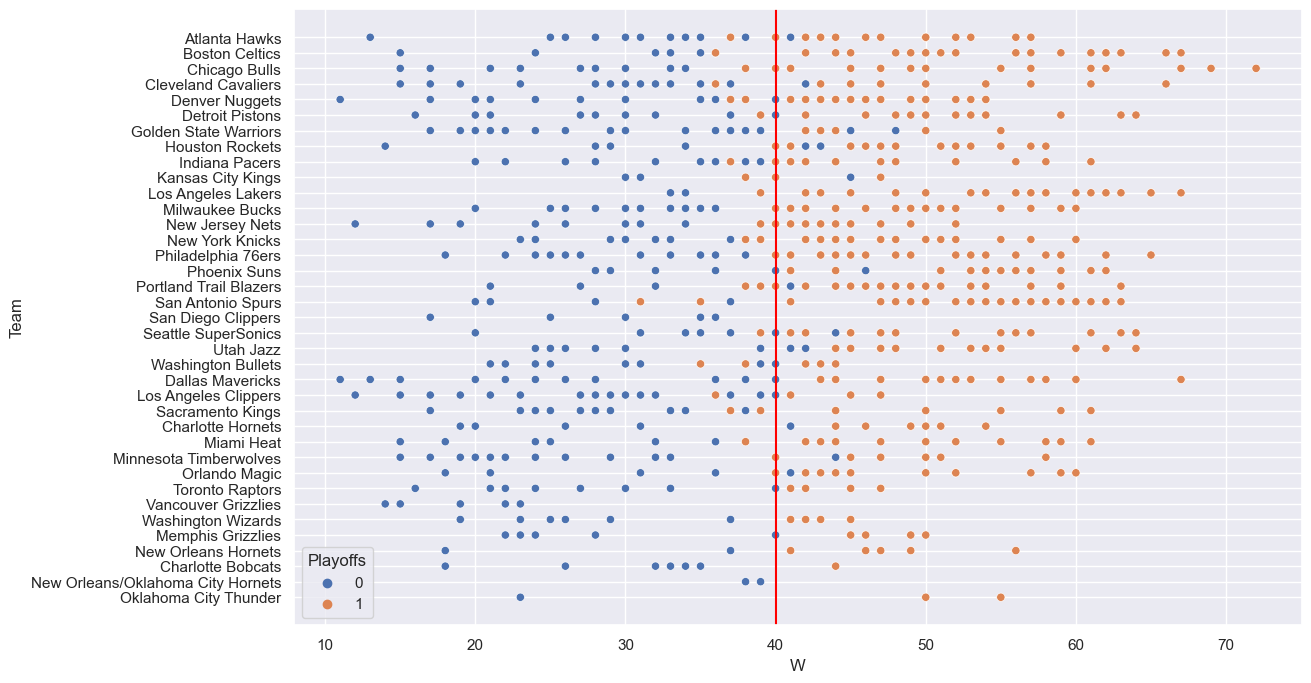

In [18]:
sns.set()
plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=40, color='red')

#### Take a rough estimate, and now use that moving forward.  



In [90]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [ ]:
'''
What columns will be the most usefull in predicting points made 
Assumptions: more points attempted would probably lead to more points made. 
             
'''

['SeasonEnd', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']


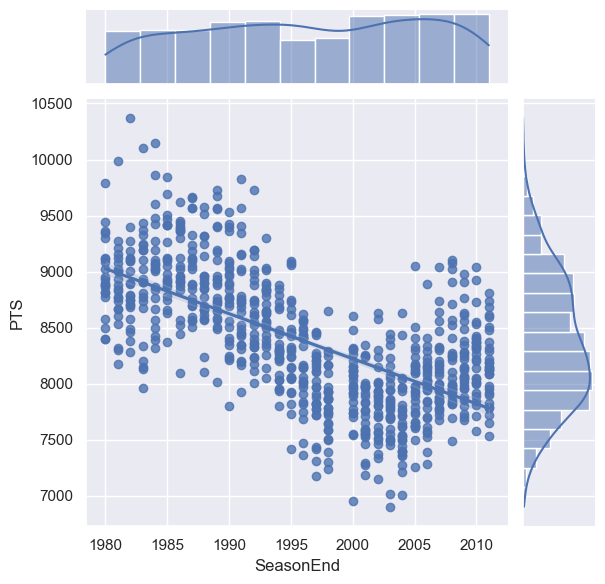

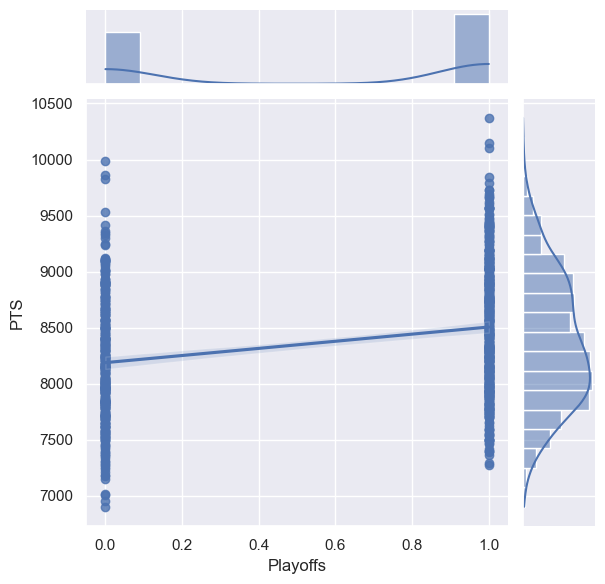

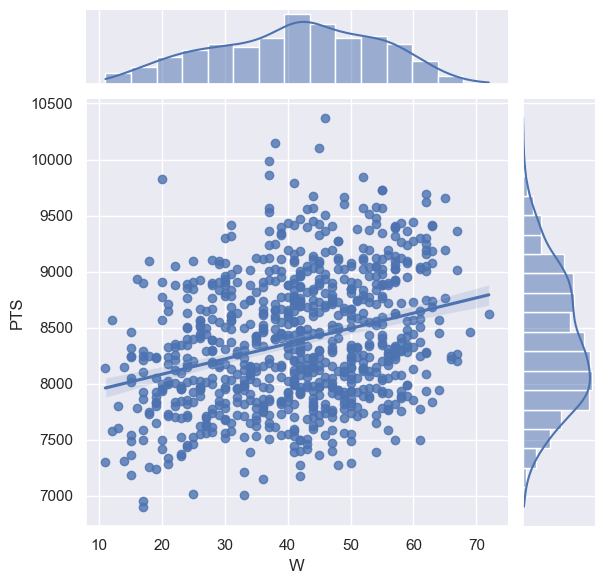

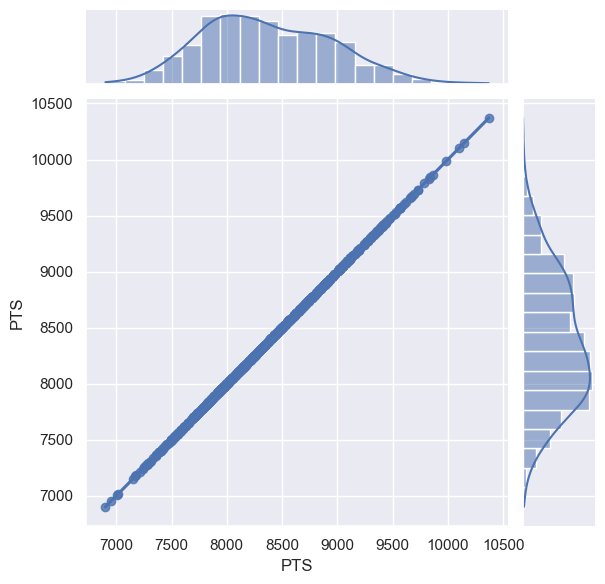

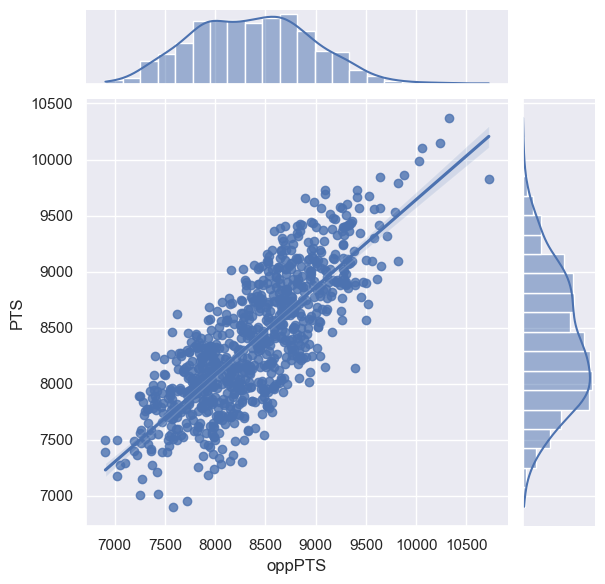

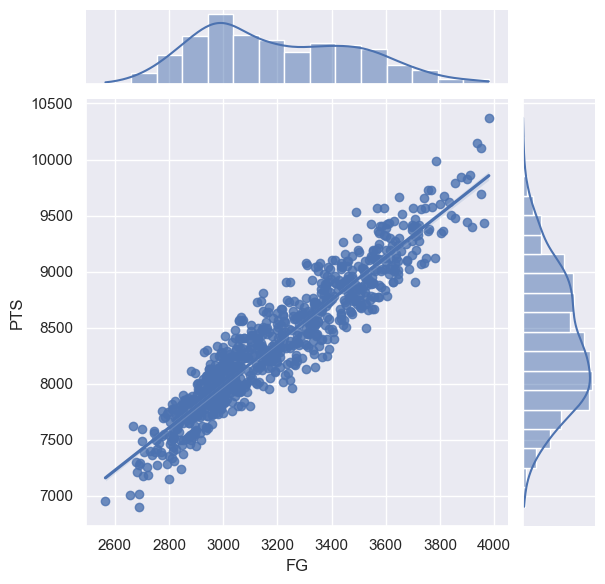

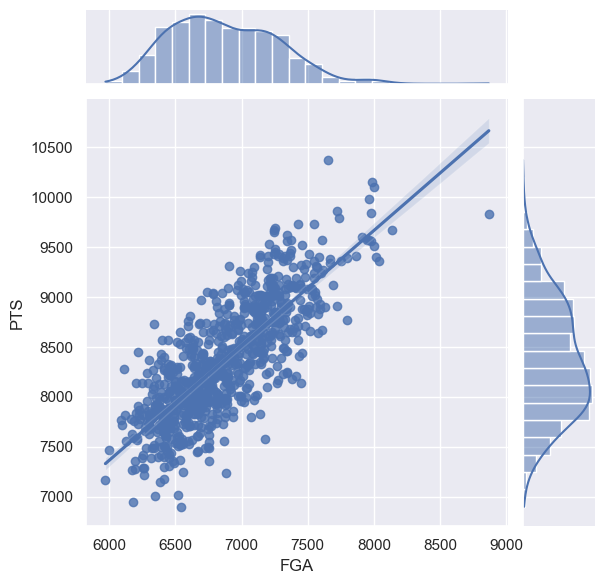

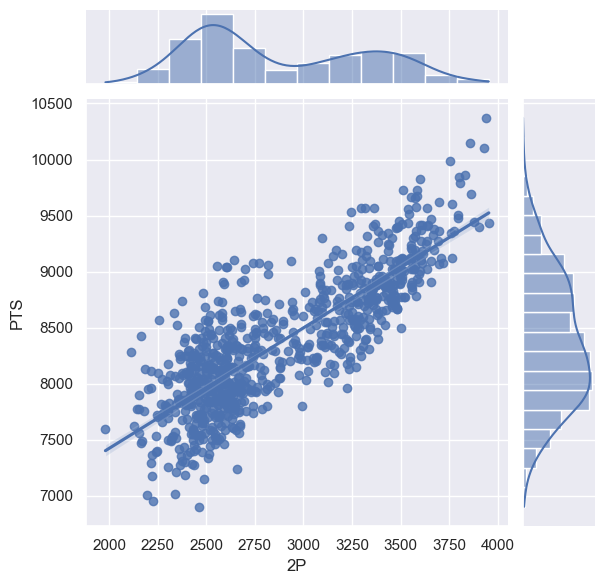

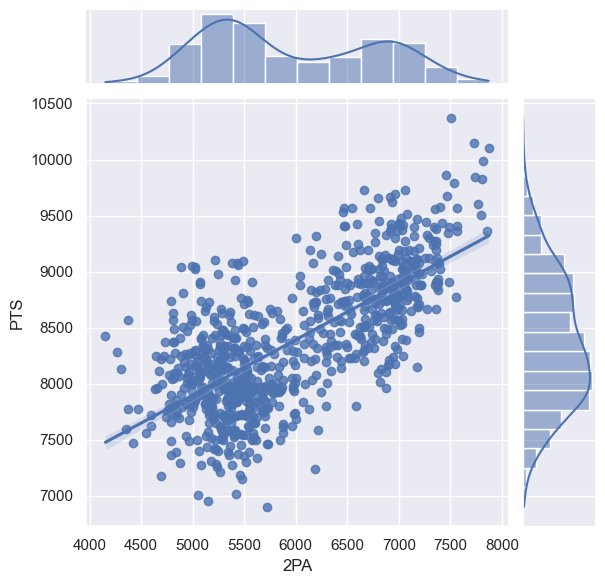

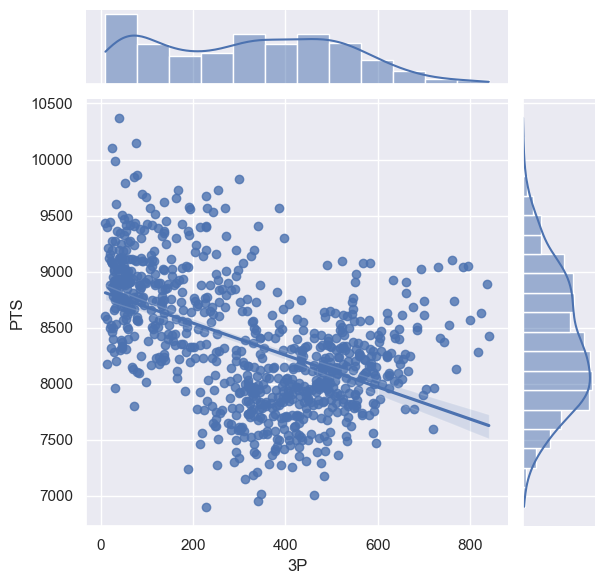

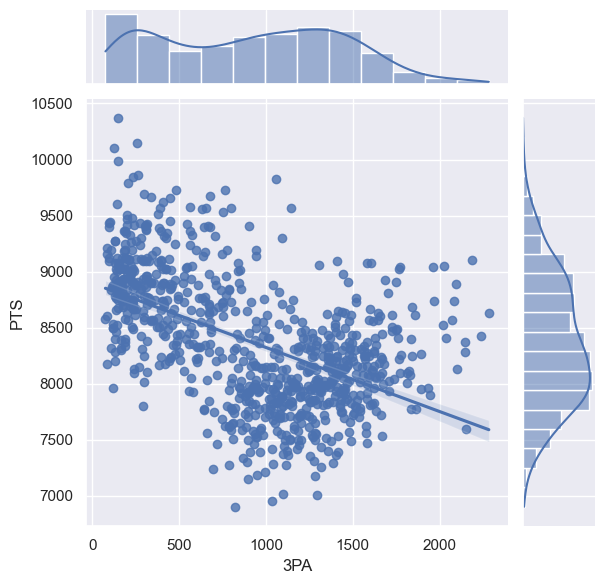

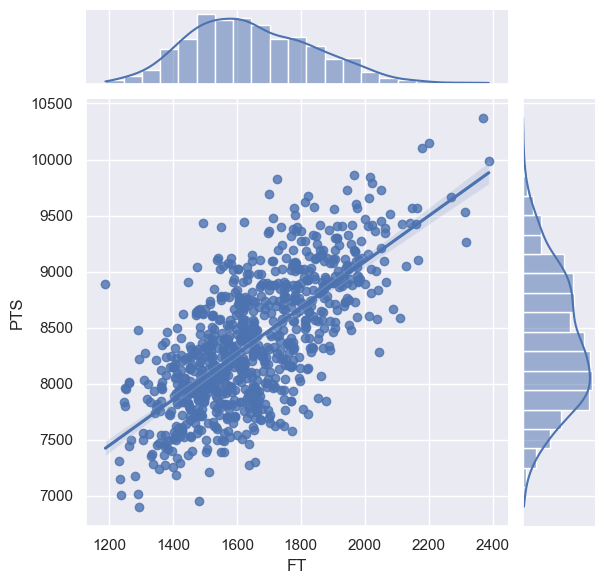

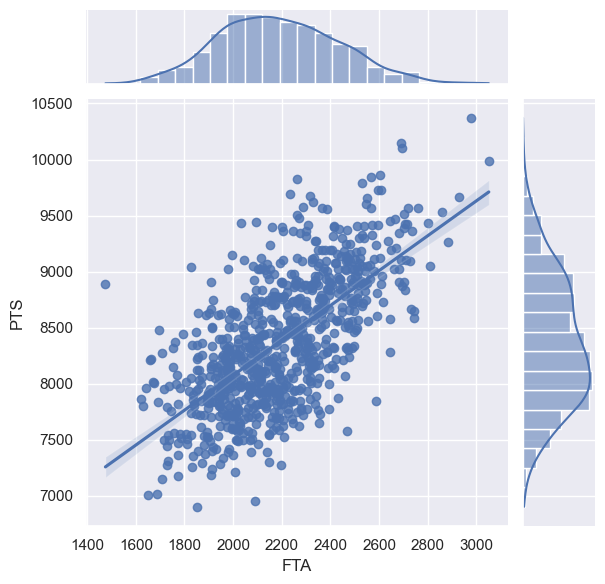

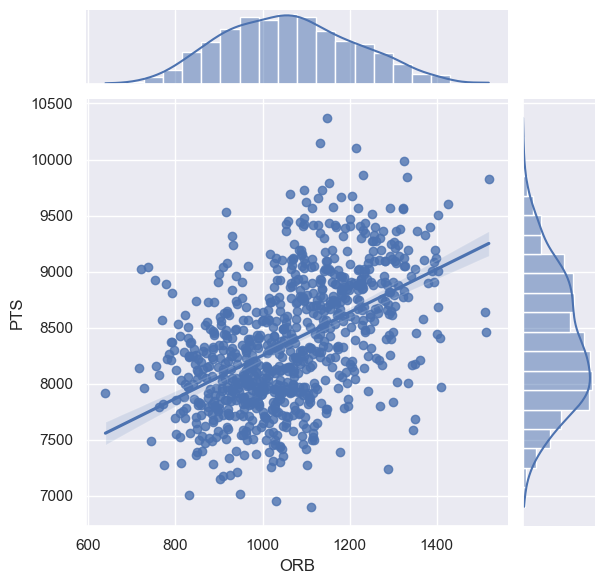

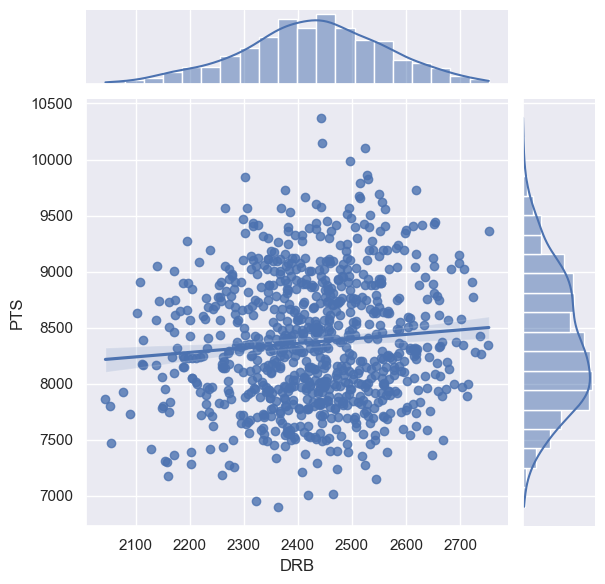

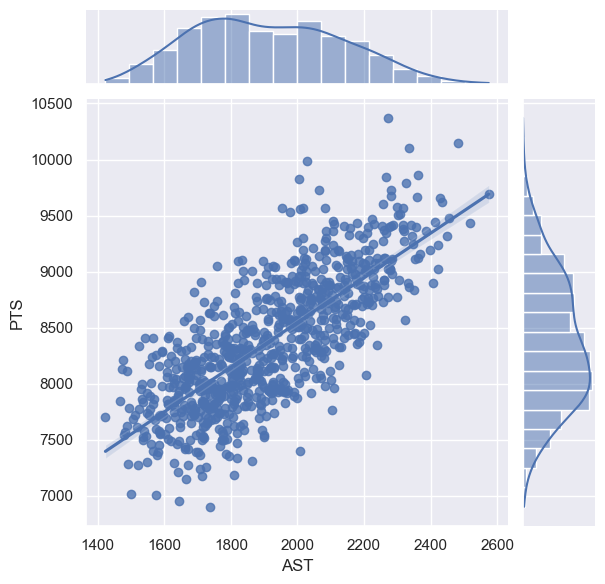

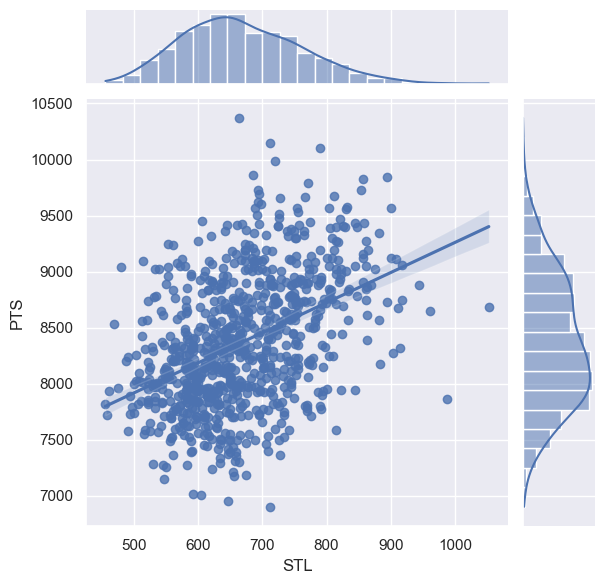

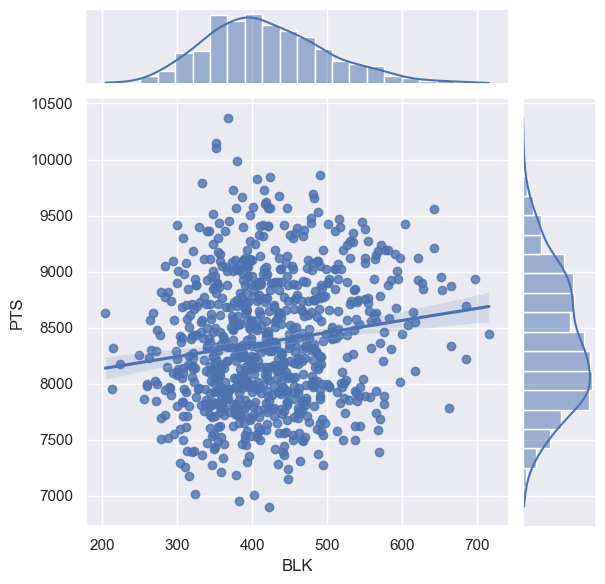

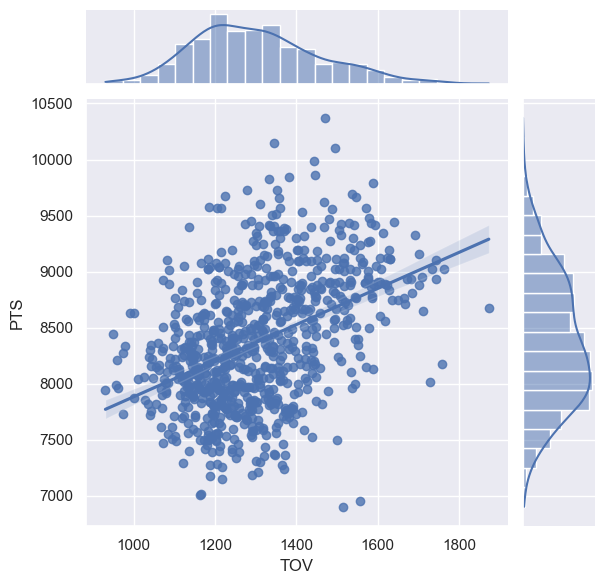

In [23]:
#trying to see what values have a linear relationship
all_numeric_vars = list(df.select_dtypes(include='number').columns)
print(all_numeric_vars)

dependent_variable = 'PTS'
for col in all_numeric_vars:
    try:
        sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");
    except:
        print('Could not plot variable %s' % col)

In [ ]:
'''
Col to remove: season end, playoffs, 2p, 3p,fg,ft, W, oppPoints, DRB, BLK - either opponent stats or having to do with defense
on the fence: AST - they only count when a point is scored. 
promissing cols: FGA, 2PA, 3PA, FTA, ORB, STL
Interesting point: 3PA has a negative correlation with PTS
Remove FGA? its just point total we should try getting more in dept with 2PA and 3PA
Not sure how to deal with Multicolineirty 
removing STL with a p value of .213
'''

In [73]:
independent_variables = ['2P','3P','FTA','ORB'] # serperated to make editing easier

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.120e+04
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:03   Log-Likelihood:                -4563.3
No. Observations:                 835   AIC:                             9137.
Df Residuals:                     830   BIC:                             9160.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.7777     37.815     -2.189      0.0

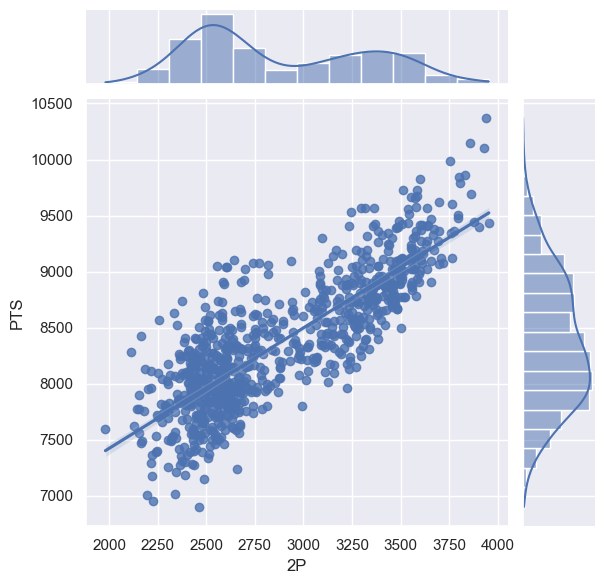

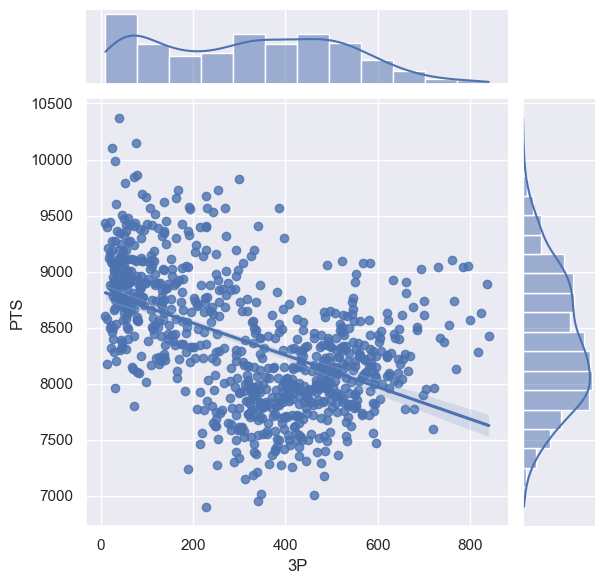

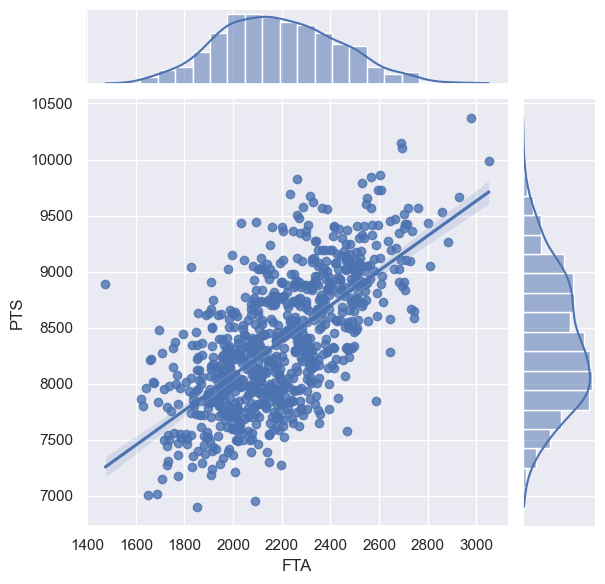

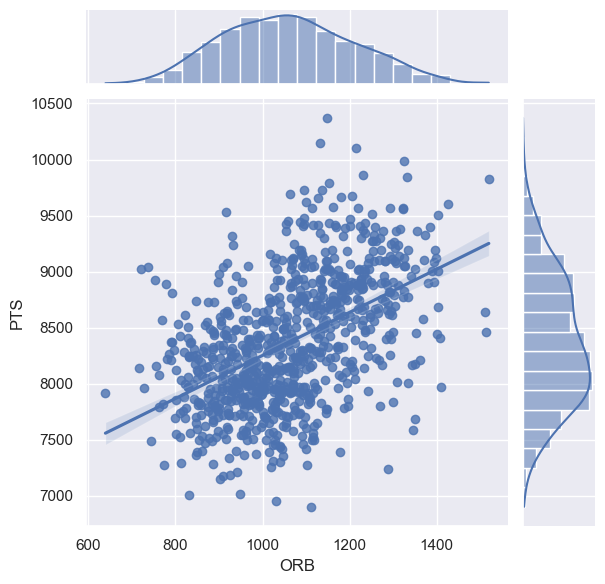

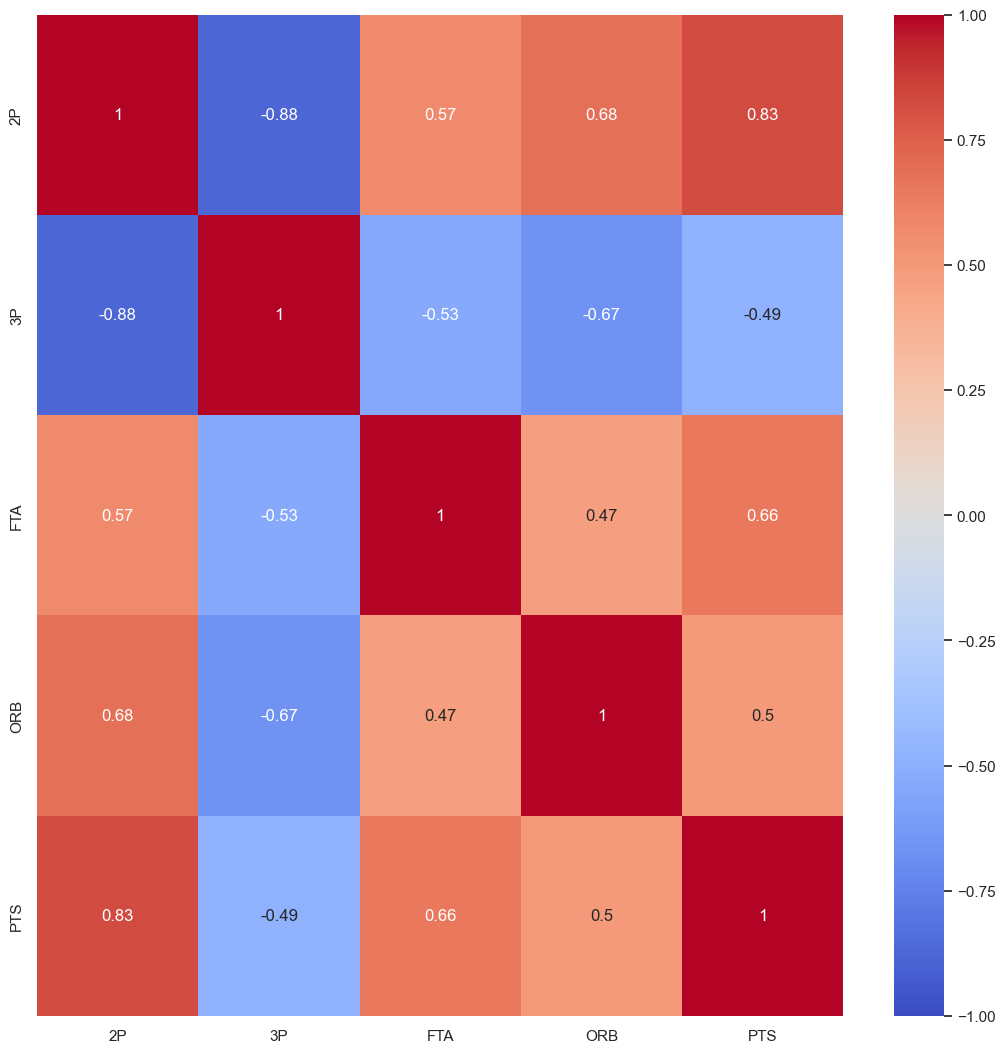

###############################################################################
Variance Inflaction Factors
        const        2P        3P       FTA       ORB
0  363.142674  4.967193  4.530306  1.525412  1.974291
###############################################################################
###############################################################################
Checking Normality


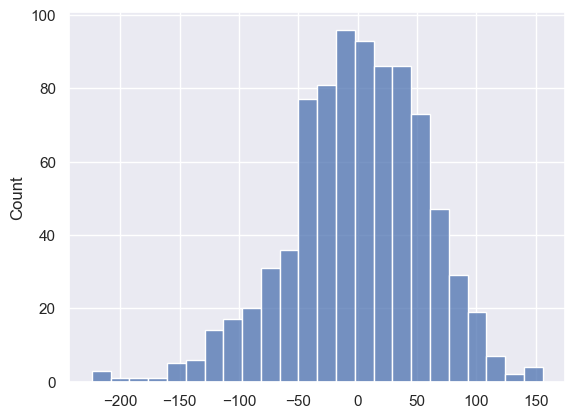

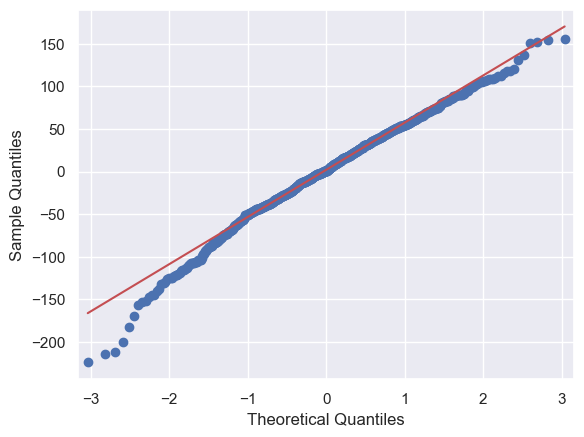

###############################################################################


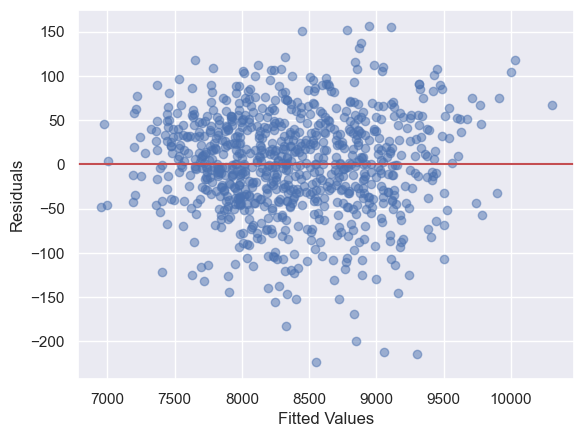

In [74]:
ivs = independent_variables
dv = 'PTS'

ctp_model = ctp.CTP_LinReg(df=df, independent_variables=ivs, dependent_variable=dv)
ctp_model.run_all()


In [ ]:
'''
On my first few attemmpts I tried using 2P and 3P but I was dealing with multicolinieratiy issues 
Settled using just FGA for this model maybe I could create different ones where 2P and 3P aren't being used together
'''

In [97]:
# Load the dataset
#Taken straight from our lecture for moneyball
df = pd.read_csv('data/NBA_train.csv')

independent_variables = ['2PA', '3PA', 'FTA', 'ORB', 'TOV', 'AST', 'STL', 'BLK']

X = df[independent_variables]
y = df['PTS']
print(y.mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_pts = LinearRegression()

lr_pts.fit(X_train, y_train)

y_pred = lr_pts.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mse_lr_pts = metrics.mean_squared_error(y_test, y_pred)

rmse_lr_pts = metrics.mean_squared_error(y_test, y_pred, squared=False)
np.sqrt(mse_lr_pts), rmse_lr_pts

8370.239520958085
R-Squared Score: 0.9084790675663936


(187.29052162088573, 187.29052162088573)

In [84]:
# Load the dataset
df = pd.read_csv('data/NBA_train.csv')

# Feature Engineering - something i asked chat gpt about - it increased the models sucess rate by .08 on average
df['2P%'] = df['2PA'] / df['2P']
df['3P%'] = df['3PA'] / df['3P']
df['FT%'] = df['FTA'] / df['FT']

# Define the features and target variable
independent_variables = ['2PA', '3PA', 'FTA', 'ORB', 'TOV', 'AST', 'STL', 'BLK','2P%', '3P%', 'FT%']

X = df[independent_variables]
y = df['PTS']

# Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_pts = LinearRegression()
lr_pts.fit(X_train, y_train)

# Make predictions
y_pred = lr_pts.predict(X_test)

# Model Evaluation
r_squared = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R-Squared Score:', r_squared)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


R-Squared Score: 0.9895006060651957
Mean Squared Error: 3765.4145857656763
Root Mean Squared Error: 61.362974062260676


In [99]:
# Load the dataset
df = pd.read_csv('data/NBA_train.csv')

# Feature Engineering
df['2P%'] = df['2PA'] / df['2P']
df['3P%'] = df['3PA'] / df['3P']
df['FT%'] = df['FTA'] / df['FT']

# Define the features and target variable
independent_variables = ['2PA', '3PA', 'FTA', 'ORB', 'TOV', 'AST', 'STL', 'BLK','2P%', '3P%', 'FT%']

X = df[independent_variables]
y = df['PTS']

# Model Building using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_pts = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_pts.fit(X_train, y_train)

# Make predictions
y_pred = rf_pts.predict(X_test)

# Model Evaluation
r_squared = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R-Squared Score:', r_squared)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R-Squared Score: 0.8806771402694877
Mean Squared Error: 42792.94969161676
Root Mean Squared Error: 206.86456847806673
